# The Spark Foundation -GRIP-Data science and Business Analytics-NOV2021

# TASK :8 TIMELINE ANALYSIS : COVID-19

# Author name : shweta kumari

Problem Statement : Create a spread of covid-19 cases in your or any region .

Task Level : Advanced

# import necessary libraries

In [1]:
from warnings import warn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv(r"C:\Users\shweta kumari\Documents\machine learning project\Task8_owid-covid-data.csv")

In [3]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24-02-2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,29-02-2020,5.0,0.0,0.714,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,01-03-2020,5.0,0.0,0.714,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,02-03-2020,5.0,0.0,0.000,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,03-03-2020,5.0,0.0,0.000,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,04-03-2020,5.0,0.0,0.000,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.243750e+05,124373.000000,123330.000000,1.132980e+05,113494.000000,123330.000000,123736.00000,123734.000000,122696.000000,112672.000000,...,88607.000000,87325.000000,57238.000000,103366.000000,122248.000000,113834.000000,4623.000000,4623.000000,4623.000000,4623.000000
mean,2.013939e+06,8338.897799,8359.638338,4.996560e+04,184.311972,168.840030,19375.14109,85.686714,85.575258,398.403924,...,10.591016,32.747459,50.870115,3.029954,73.259252,0.726248,31277.501168,8.584811,15.794497,769.119301
std,1.150869e+07,43516.048476,43023.843904,2.565859e+05,873.118464,819.030964,32256.71325,197.748216,167.062820,657.619025,...,10.503087,13.511373,31.822241,2.455970,7.533284,0.150048,88253.529156,15.911791,31.094783,1154.573476
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.00100,-3125.829000,-272.971000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-31959.400000,-27.350000,-95.920000,-1749.128494
25%,2.347000e+03,3.000000,10.286000,7.900000e+01,0.000000,0.143000,401.88400,0.335000,1.652000,11.723750,...,1.900000,21.600000,20.859000,1.300000,67.920000,0.602000,-175.550000,-1.035000,-0.930000,-45.020446
50%,2.652900e+04,104.000000,129.714000,7.270000e+02,2.000000,2.000000,3102.23600,11.294000,15.808500,78.325000,...,6.300000,31.400000,49.839000,2.400000,74.620000,0.744000,2159.200000,5.130000,6.380000,359.539172
75%,2.598825e+05,1073.000000,1128.821250,6.416000e+03,22.000000,18.571000,24380.29875,82.823750,92.410000,512.321500,...,19.300000,41.300000,83.241000,4.000000,78.740000,0.845000,19795.600000,13.505000,22.050000,1332.908083
max,2.495419e+08,907963.000000,826457.571000,5.044839e+06,18007.000000,14703.286000,235692.64300,8620.690000,3385.473000,6007.569000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,870830.300000,106.830000,373.550000,6152.317119


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131500 entries, 0 to 131499
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 131500 non-null  object 
 1   continent                                123091 non-null  object 
 2   location                                 131500 non-null  object 
 3   date                                     131500 non-null  object 
 4   total_cases                              124375 non-null  float64
 5   new_cases                                124373 non-null  float64
 6   new_cases_smoothed                       123330 non-null  float64
 7   total_deaths                             113298 non-null  float64
 8   new_deaths                               113494 non-null  float64
 9   new_deaths_smoothed                      123330 non-null  float64
 10  total_cases_per_million         

In [6]:
df.shape

(131500, 65)

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows : ", duplicate_rows_df.shape)

Number of duplicate rows :  (0, 65)


In [8]:
df.count()

iso_code                                   131500
continent                                  123091
location                                   131500
date                                       131500
total_cases                                124375
                                            ...  
human_development_index                    113834
excess_mortality_cumulative_absolute         4623
excess_mortality_cumulative                  4623
excess_mortality                             4623
excess_mortality_cumulative_per_million      4623
Length: 65, dtype: int64

# Checking the missing or NULL value

In [9]:
print(df.isnull().sum())

iso_code                                        0
continent                                    8409
location                                        0
date                                            0
total_cases                                  7125
                                            ...  
human_development_index                     17666
excess_mortality_cumulative_absolute       126877
excess_mortality_cumulative                126877
excess_mortality                           126877
excess_mortality_cumulative_per_million    126877
Length: 65, dtype: int64


In [10]:
df1=df[["date","total_cases","new_cases","total_deaths","new_tests","total_tests"]]
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,24-02-2020,5.0,5.0,NaN,NaN,NaN
1,25-02-2020,5.0,0.0,NaN,NaN,NaN
2,26-02-2020,5.0,0.0,NaN,NaN,NaN
3,27-02-2020,5.0,0.0,NaN,NaN,NaN
4,28-02-2020,5.0,0.0,NaN,NaN,NaN


In [11]:
df1.date = pd.to_datetime(df.date)
df1.set_index('date',inplace=True)
df1.head()
df1.tail()

c:\users\shweta kumari\downloads\python3.8.5\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2021-02-11,133047.0,40.0,4683.0,6075.0,1381554.0
2021-03-11,133091.0,44.0,4684.0,NaN,NaN
2021-04-11,133112.0,21.0,4685.0,NaN,NaN
2021-05-11,133112.0,0.0,4685.0,NaN,NaN
2021-06-11,133168.0,56.0,4685.0,NaN,NaN


Text(0.5, 0, 'Month')

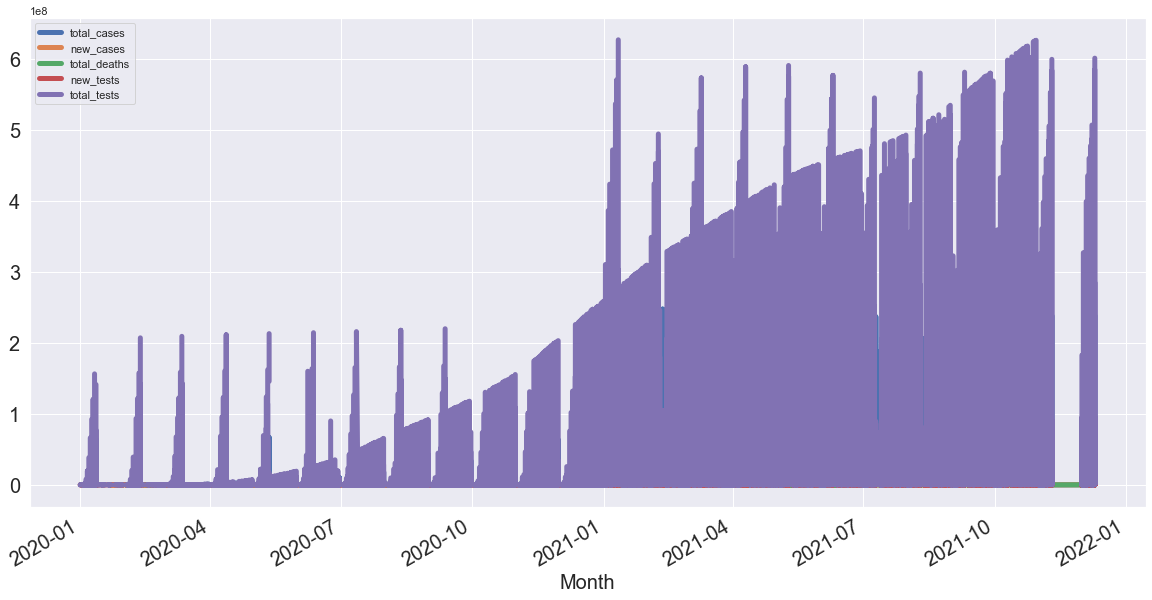

In [12]:
df1.plot(figsize=(20,10), linewidth =5, fontsize = 20)
plt.xlabel('Month',fontsize=20)

Text(0.5, 0, 'Month')

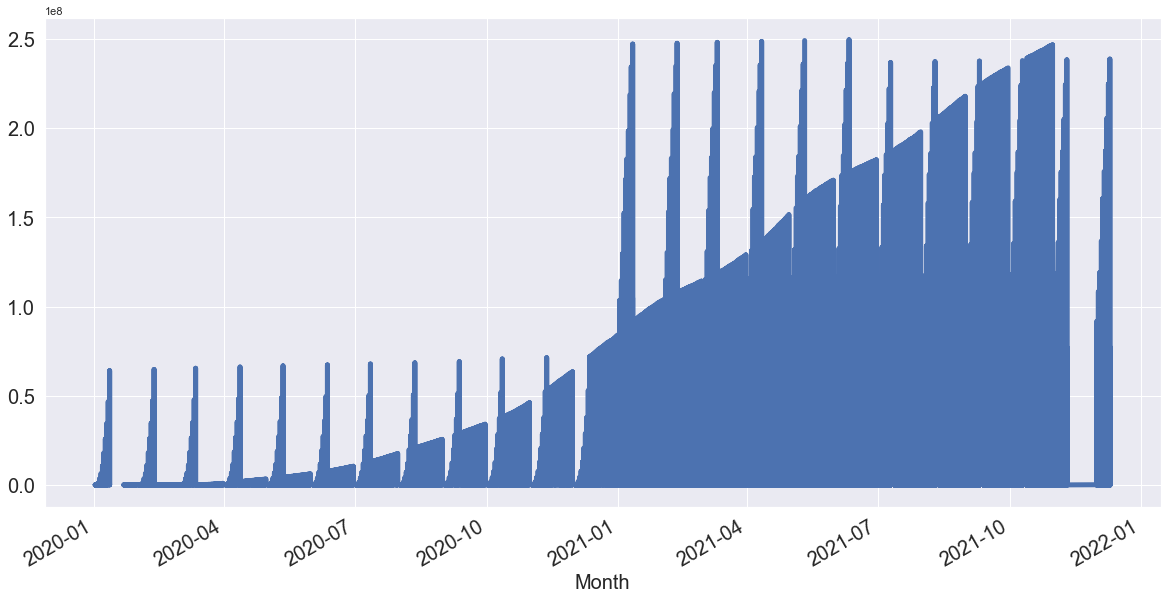

In [13]:
df1.total_cases.plot(figsize = (20,10),linewidth = 5,fontsize =20)
plt.xlabel('Month',fontsize=20)

Text(0.5, 0, 'Month')

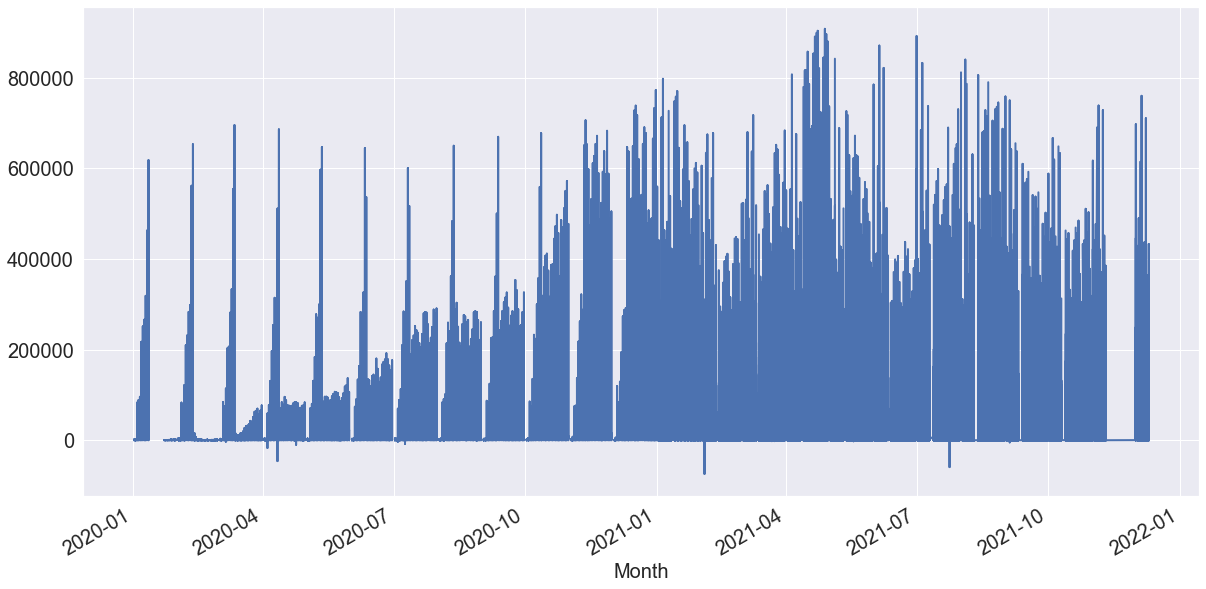

In [14]:
df1.new_cases.plot(figsize = (20,10), linewidth =2, fontsize = 20)
plt.xlabel('Month',fontsize=20)

Text(0.5, 0, 'Month')

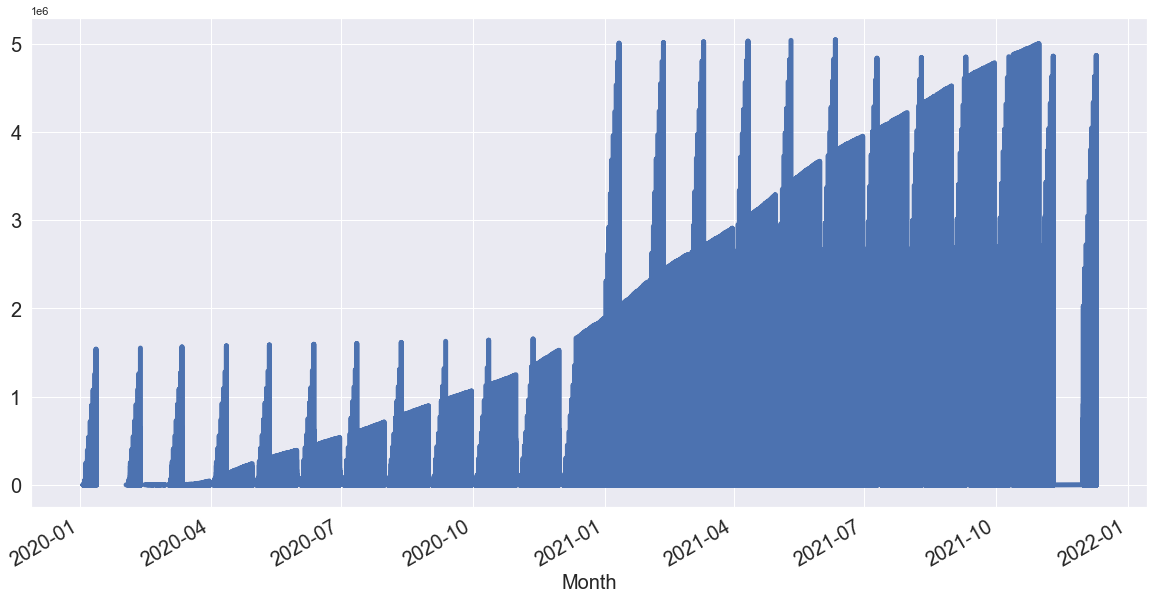

In [15]:
df1.total_deaths.plot(figsize = (20,10),linewidth = 5,fontsize =20)
plt.xlabel('Month',fontsize=20)

Text(0.5, 0, 'Month')

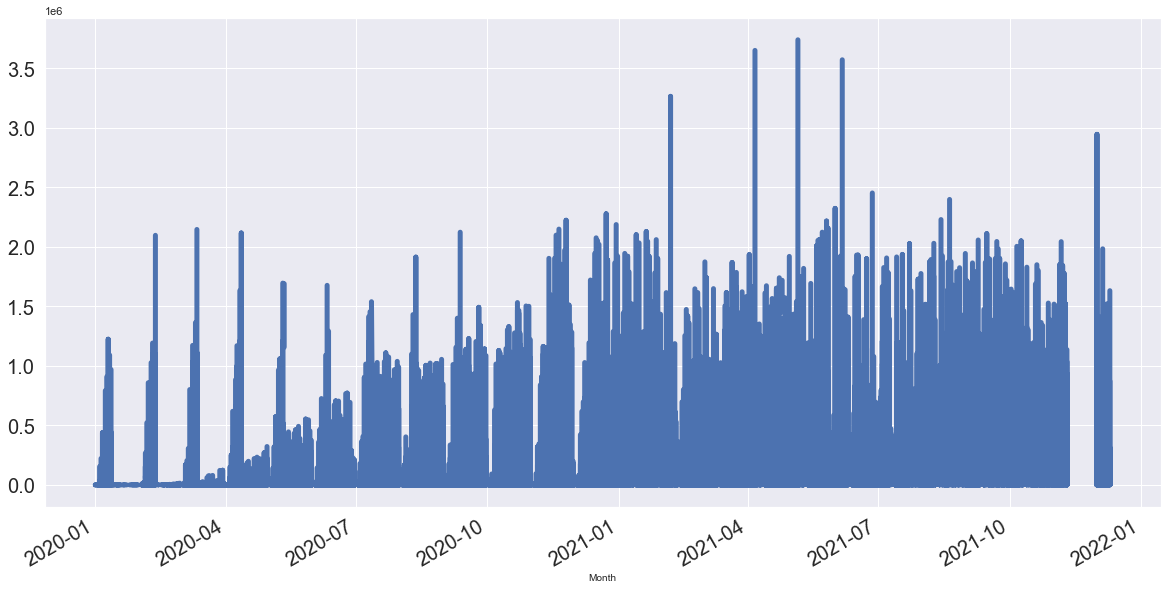

In [16]:
df1.new_tests.plot(figsize = (20,10),linewidth = 5,fontsize =20)
plt.xlabel('Month',fontsize=10)

Text(0.5, 0, 'Month')

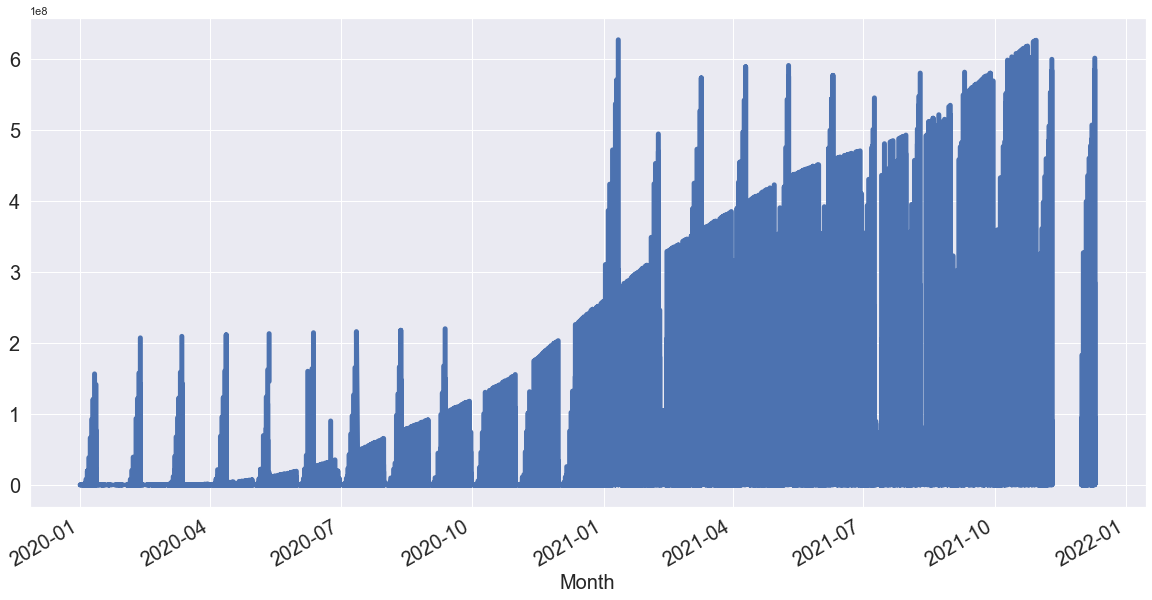

In [17]:
df1.total_tests.plot(figsize = (20,10),linewidth = 5,fontsize =20)
plt.xlabel('Month',fontsize=20)

# Trends and Sesonality in TImeSeries Data

Text(0.5, 0, 'Month')

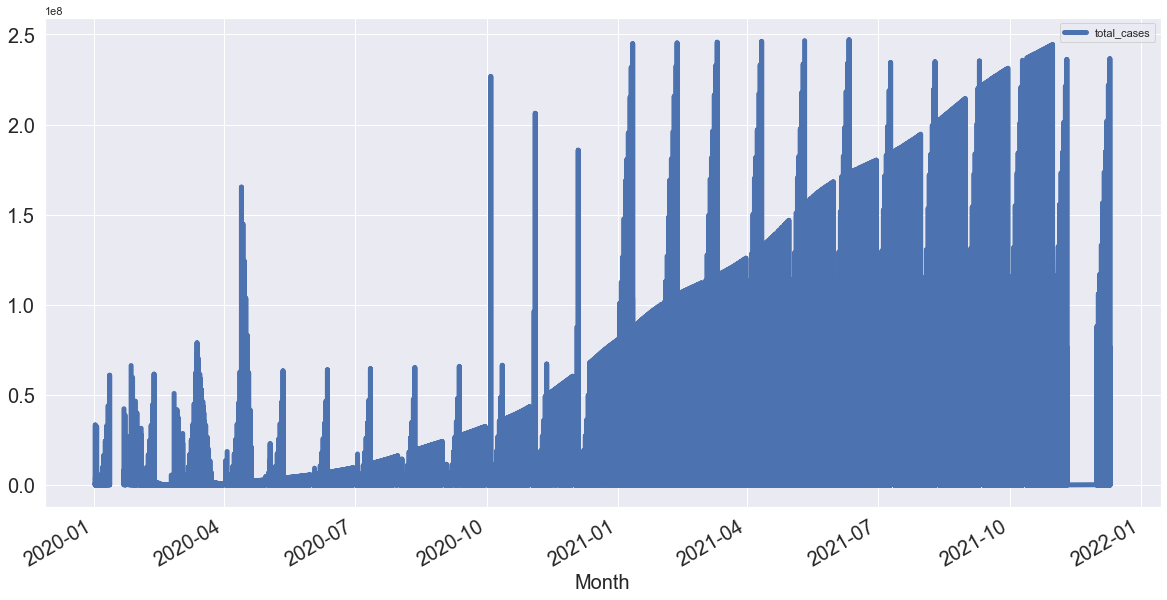

In [18]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize=(20,10),linewidth = 5, fontsize =20)
plt.xlabel('Month',fontsize = 20)

Text(0.5, 0, 'Month')

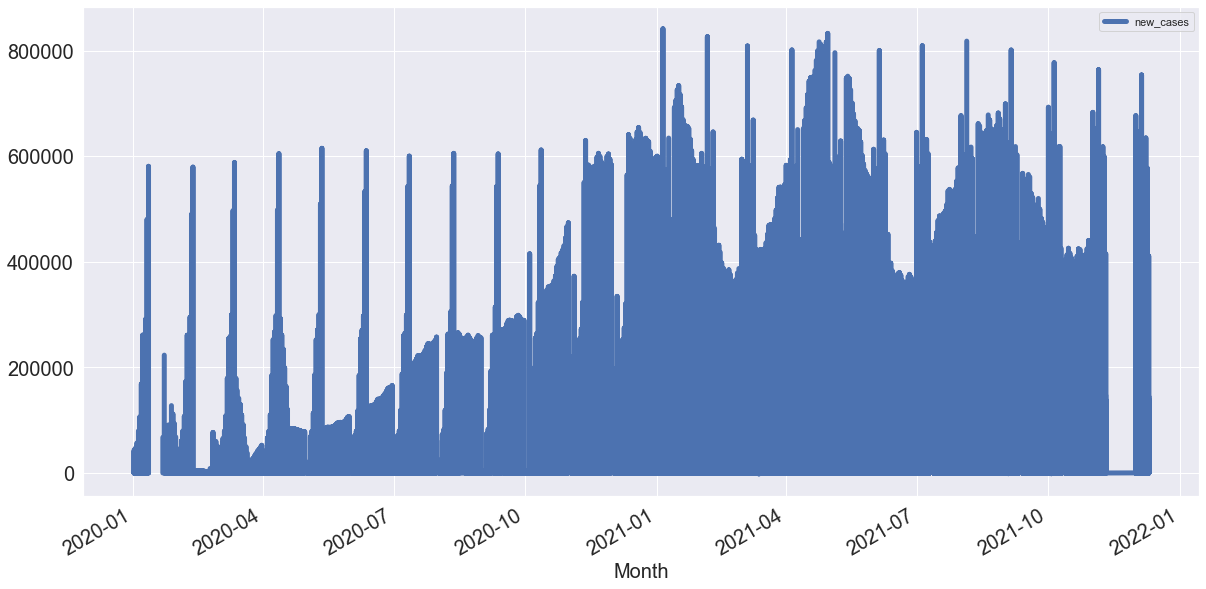

In [19]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize=(20,10),linewidth = 5, fontsize =20)
plt.xlabel('Month',fontsize = 20)

Text(0.5, 0, 'Month')

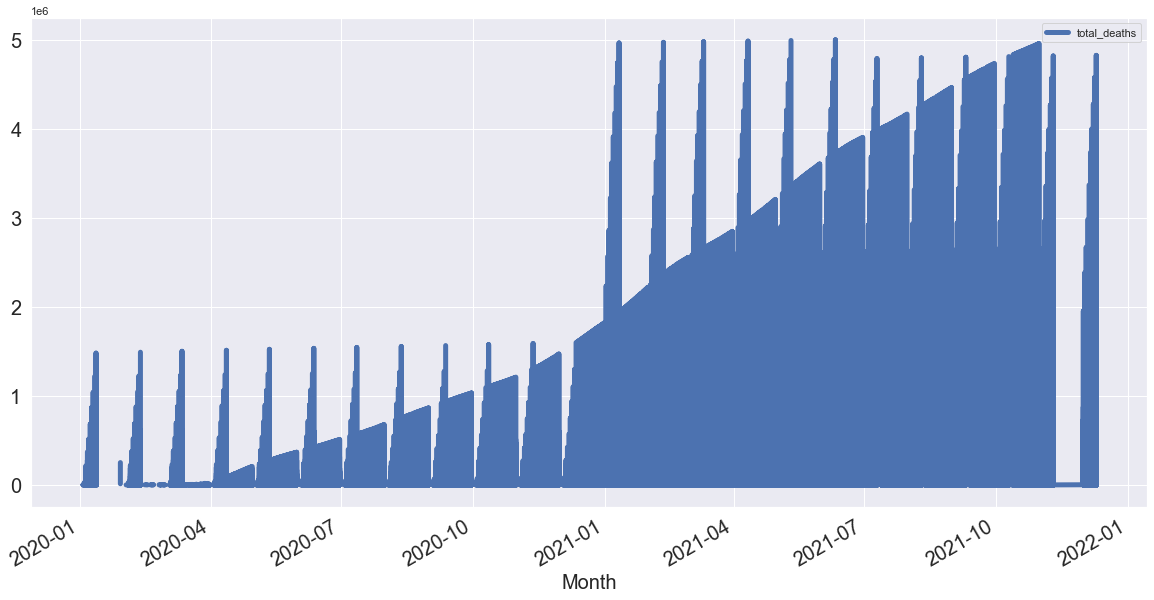

In [20]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize=(20,10),linewidth = 5, fontsize =20)
plt.xlabel('Month',fontsize = 20)

Text(0.5, 0, 'Month')

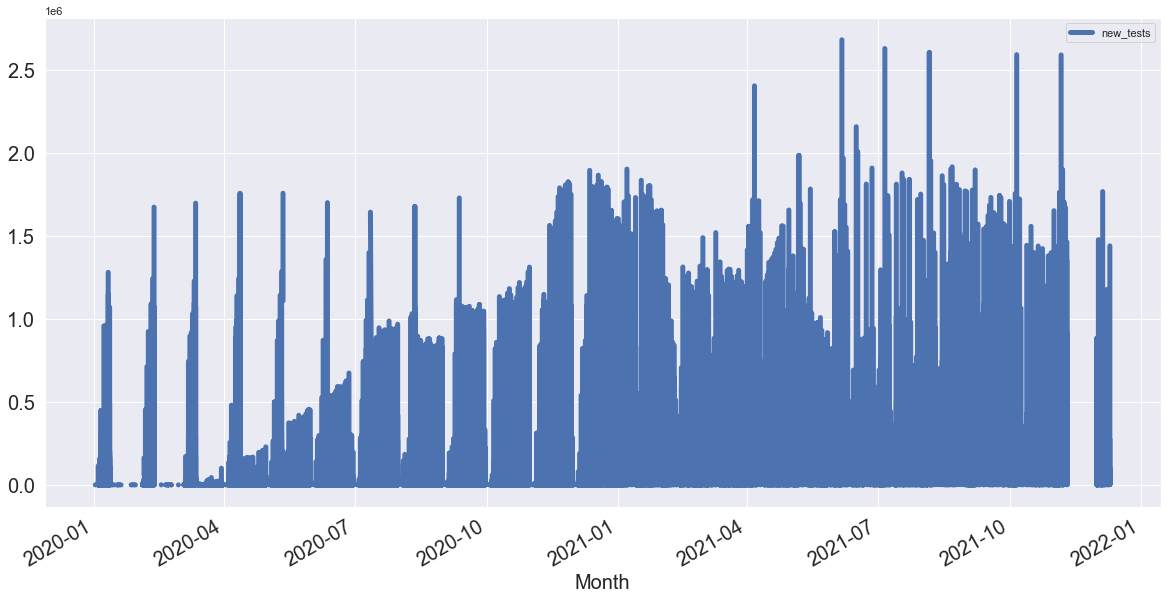

In [21]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize=(20,10),linewidth = 5, fontsize =20)
plt.xlabel('Month',fontsize = 20)

Text(0.5, 0, 'Month')

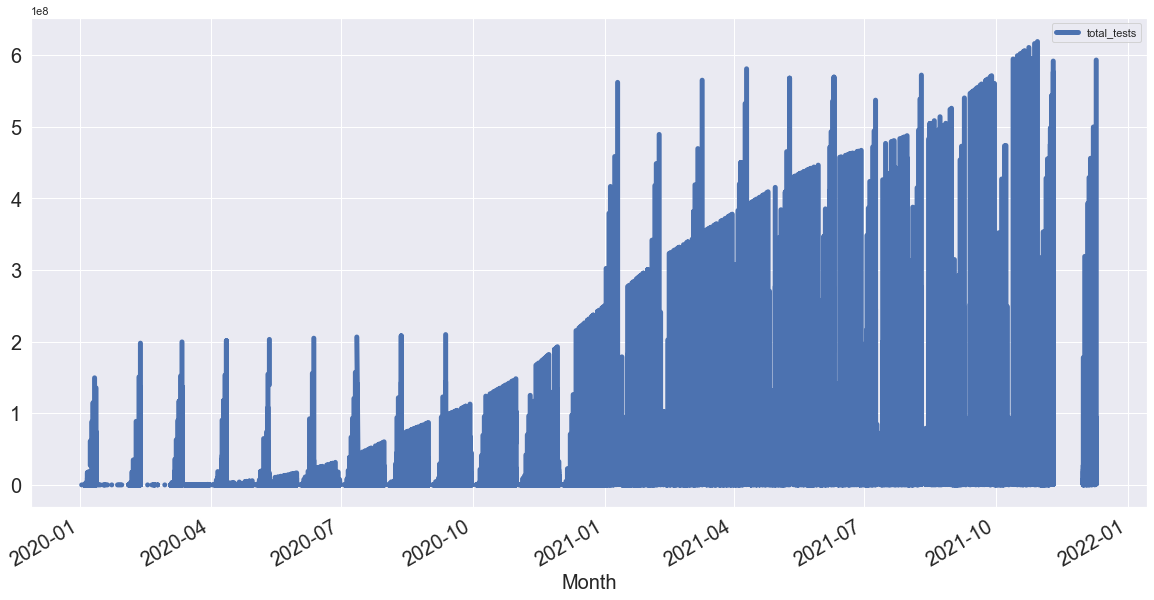

In [22]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize=(20,10),linewidth = 5, fontsize =20)
plt.xlabel('Month',fontsize = 20)

Text(0.5, 0, 'Month')

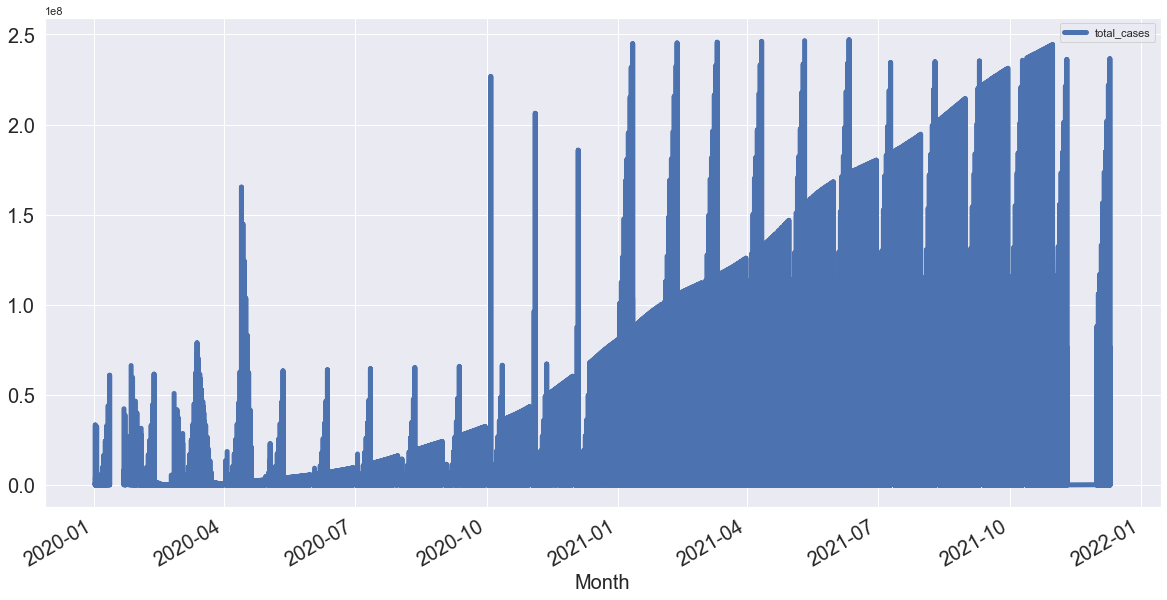

In [23]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize=(20,10),linewidth = 5, fontsize =20)
plt.xlabel('Month',fontsize = 20)

# THANK YOU 